# Notebook to extract hidden-states and attention heads activations from gpt2 model predictions

In [26]:
import os
import glob
import torch
import gc
import numpy as np
import pandas as pd
from tqdm import tqdm
from model import GPT2Extractor
from sklearn.preprocessing import StandardScaler
from tokenizer import tokenize
from utils import set_seed
from numpy import linalg as la

In [15]:
def check_folder(path):
    """Create adequate folders if necessary."""
    try:
        if not os.path.isdir(path):
            check_folder(os.path.dirname(path))
            os.mkdir(path)
    except:
        pass

In [16]:
def transform(activations, path, name, run_index, n_layers_hidden=13, n_layers_attention=12, hidden_size=768):
    assert activations.values.shape[1] == (n_layers_hidden + n_layers_attention) * hidden_size
    indexes = [[index*hidden_size, (index+1)*hidden_size] for index in range(n_layers_hidden + n_layers_attention)]
    for order in [np.inf]:
        matrices = []
        for index in indexes:
            matrix = activations.values[:, index[0]:index[1]]
            with_std = True if order=='std' else False
            scaler = StandardScaler(with_mean=True, with_std=with_std)
            scaler.fit(matrix)
            matrix = scaler.transform(matrix)
            if order is not None and order != 'std':
                matrix = matrix / np.mean(la.norm(matrix, ord=order, axis=1))
            matrices.append(matrix)
        matrices = np.hstack(matrices)
        new_data = pd.DataFrame(matrices, columns=activations.columns)
        new_path = path + '_norm-' + str(order).replace('np.', '')
        check_folder(new_path)
        new_data.to_csv(os.path.join(new_path, name + '_run{}.csv'.format(run_index + 1)), index=False)


Defining variables:

In [17]:
template = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/text/english/text_english_run*.txt' # path to text input
language = 'english'

Creating iterator for each run:

In [18]:
#template = '/Users/alexpsq/Code/Parietal/data/text_english_run*.txt' # path to text input


In [19]:
paths = sorted(glob.glob(template))

In [20]:
iterator_list = [tokenize(path, language, train=False) for path in paths]

100%|██████████| 207/207 [00:00<00:00, 271064.92it/s]


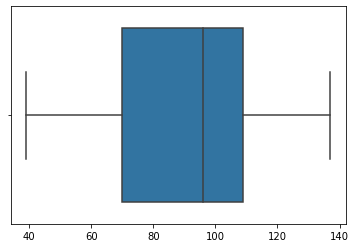

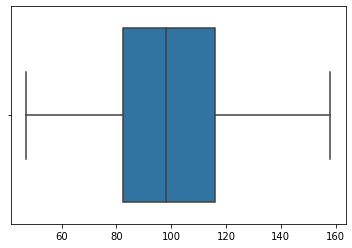

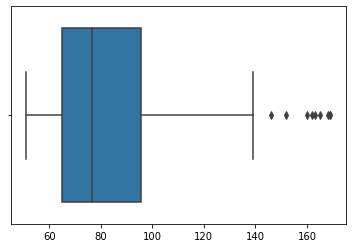

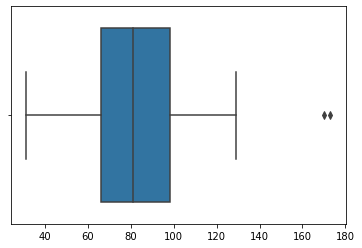

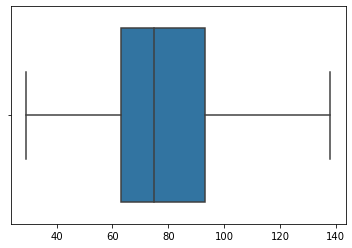

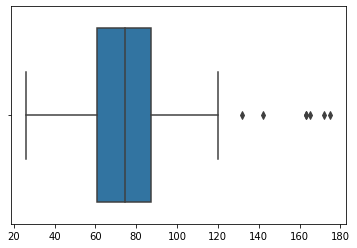

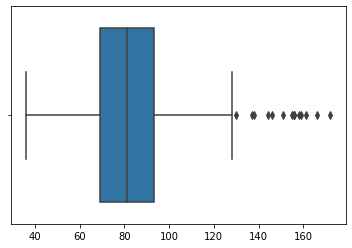

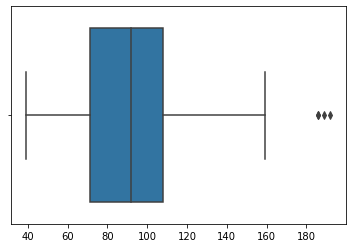

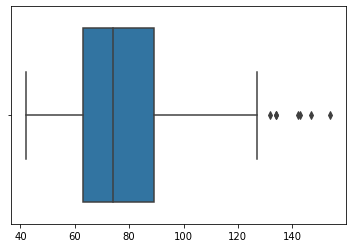


85.53687721909664
81.0
83.11111111111111


In [8]:
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

lengths = []

for index in range(9):
    batches, indexes = utils.batchify_per_sentence_with_context(
                iterator_list[index], 
                1, 
                5, 
                'gpt2', 
                max_length=512)
    #lengths.append(np.array(sorted([len(item.split()) for item in batches])))
    lengths.append(np.array(sorted([len(tokenizer.tokenize(item)) for item in batches])))

    sns.boxplot(lengths[-1])
    plt.show()
    print()

print(np.mean(np.array([np.mean(item) for item in lengths])))
print(np.median(np.array([np.median(item) for item in lengths])))
print(np.mean(np.array([np.median(item) for item in lengths])))

In [41]:
pretrained_gpt2_models = ['gpt2'] * 21
names = [
    'gpt2_pre-20_sent-stop-0_0',
    'gpt2_pre-20_sent-stop-1_0',
    'gpt2_pre-20_sent-stop-2_0',
    'gpt2_pre-20_sent-stop-3_0',
    'gpt2_pre-20_sent-stop-4_0',
    'gpt2_pre-20_sent-stop-5_0',
    'gpt2_pre-20_sent-stop-6_0',
    'gpt2_pre-20_sent-stop-7_0',
    'gpt2_pre-20_sent-stop-8_0',
    'gpt2_pre-20_sent-stop-9_0',
    'gpt2_pre-20_sent-stop-10_0',
    'gpt2_pre-20_sent-stop-11_0',
    'gpt2_pre-20_sent-stop-12_0',
    'gpt2_pre-20_sent-stop-13_0',
    'gpt2_pre-20_sent-stop-14_0',
    'gpt2_pre-20_sent-stop-15_0',
    'gpt2_pre-20_sent-stop-16_0',
    'gpt2_pre-20_sent-stop-17_0',
    'gpt2_pre-20_sent-stop-18_0',
    'gpt2_pre-20_sent-stop-19_0',
    'gpt2_pre-20_sent-stop-20_0',
        ]
config_paths = [None] * 21
saving_path_folders = [
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-0_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-1_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-2_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-3_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-4_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-5_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-6_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-7_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-8_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-9_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-10_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-11_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-12_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-13_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-14_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-15_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-16_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-17_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-18_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-19_0'.format(language),
    '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}/gpt2_pre-20_sent-stop-20_0'.format(language),
    
]
prediction_types = ['sentence'] * 21
number_of_sentence_list = [1] * 21
number_of_sentence_before_list = [20] * 21  
attention_length_before_list = [None] * 21
stop_attention_at_sent_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
stop_attention_before_sent_list = [0] * 21


In [42]:
saving_path_folders

['/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_pre-20_sent-stop-0_0',
 '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_pre-20_sent-stop-1_0',
 '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_pre-20_sent-stop-2_0',
 '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_pre-20_sent-stop-3_0',
 '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_pre-20_sent-stop-4_0',
 '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_pre-20_sent-stop-5_0',
 '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_pre-20_sent-stop-6_0',
 '/neurospin/

In [40]:
import utils
config = {'stop_attention_at_sent': 0,
          'number_of_sentence': 1,
          'stop_attention_before_sent': 0
         }

batches, indexes = utils.batchify_with_detailed_indexes(
            iterator_list[0], 
            config['number_of_sentence'], 
            4, 
            'gpt2', 
            512,
            config['stop_attention_at_sent'],
            config['stop_attention_before_sent']
        )



indexes_tmp = [(indexes[i][-config['number_of_sentence']][0], indexes[i][-1][1]) for i in range(len(indexes))]
indexes_tmp[0] = (indexes[0][0][0], indexes[0][-1][1])
print(indexes_tmp)



from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

m = 0

for index, batch in enumerate(batches):
    batch = batch.strip() # Remove trailing character

    tokenized_text = tokenizer.tokenize(batch, add_prefix_space=True)
    inputs_ids = torch.tensor([tokenizer.convert_tokens_to_ids(tokenized_text)])
    attention_mask = torch.tensor([[1 for x in tokenized_text]])

    if (index > 0):
        attention_mask[:, :indexes[index][-config['stop_attention_at_sent']-config['number_of_sentence']][0]] = 0
        if config['stop_attention_before_sent'] < 0:
            attention_mask[:, indexes[index][-config['stop_attention_at_sent']-config['number_of_sentence']][0]:indexes[index][-config['stop_attention_at_sent']-config['number_of_sentence']][0]-config['stop_attention_before_sent']] = 0
        elif config['stop_attention_before_sent'] > 0:
            attention_mask[:, indexes[index][-config['stop_attention_at_sent']-config['number_of_sentence']][0]-config['stop_attention_before_sent']:indexes[index][-config['stop_attention_at_sent']-config['number_of_sentence']][0]] = 1
    mapping = utils.match_tokenized_to_untokenized(tokenized_text, batch)
    
    m += len(tokenized_text[indexes_tmp[index][0]:indexes_tmp[index][1]])
    print(np.array(tokenized_text)[attention_mask.detach().numpy()[0].astype(bool)])
    print()
print(m)

[(0, 32), (0, 13), (0, 8), (0, 21), (74, 96), (64, 94), (81, 86), (78, 101), (80, 97), (75, 83), (53, 66), (61, 82), (59, 67), (50, 92), (84, 101), (88, 106), (85, 113), (105, 120), (78, 89), (72, 85), (67, 79), (51, 64), (49, 67), (56, 66), (53, 61), (49, 59), (46, 81), (63, 77), (67, 82), (74, 99), (89, 96), (61, 75), (61, 74), (59, 84), (59, 66), (59, 89), (75, 86), (73, 84), (59, 79), (72, 92), (62, 81), (70, 77), (66, 73), (53, 59), (39, 48), (29, 45), (38, 43), (36, 44), (38, 53), (44, 60), (44, 59), (54, 61), (53, 93), (78, 91), (75, 87), (72, 97), (90, 112), (72, 94), (81, 100), (88, 95), (70, 84), (62, 97), (75, 115), (96, 107), (100, 107), (93, 120), (85, 96), (56, 72), (61, 63), (56, 72), (45, 62), (51, 59), (43, 48), (46, 53), (37, 41), (24, 35), (27, 36), (31, 37), (30, 49), (45, 59), (48, 52), (43, 74), (68, 81), (62, 96), (82, 91), (87, 114), (83, 96), (83, 89), (55, 70), (61, 69), (42, 52), (39, 53), (47, 49), (34, 42), (34, 45), (35, 49), (35, 52), (50, 68), (60, 108),

['ĠStraight' 'Ġahead' 'Ġ...' 'ĠâĢ' 'Ŀ']

['ĠThen' 'Ġthe' 'Ġlittle' 'Ġprince' 'Ġsaid' 'Ġgrave' 'ly' 'Ġ:' 'ĠâĢ' 'ľ'
 'ĠThat' 'Ġdoesn' 'ĠâĢ' 'Ļ' 'Ġt' 'Ġmatter' 'Ġ;' 'Ġwhere' 'ĠI' 'Ġlive' 'Ġ,'
 'Ġeverything' 'Ġis' 'Ġso' 'Ġsmall' 'Ġ!' 'ĠâĢ' 'Ŀ']

['ĠAnd' 'Ġperhaps' 'Ġwith' 'Ġa' 'Ġhint' 'Ġof' 'Ġsadness' 'Ġ,' 'Ġhe'
 'Ġadded' 'Ġ:' 'ĠâĢ' 'ľ' 'ĠStraight' 'Ġahead' 'Ġyou' 'Ġcan' "Ġ'" 'Ġt'
 'Ġgo' 'Ġfar' 'Ġ...' 'ĠâĢ' 'Ŀ']

2062


## Activation extraction

In [43]:
output_attentions = False
output_hidden_states = True

In [44]:
for index, gpt2_model in enumerate(pretrained_gpt2_models):
    extractor = GPT2Extractor(gpt2_model, 
                              language, 
                              names[index], 
                              prediction_types[index],
                              output_hidden_states=output_hidden_states, 
                              output_attentions=output_attentions,
                              attention_length_before=attention_length_before_list[index],
                              config_path=config_paths[index],
                              max_length=512, 
                              number_of_sentence=number_of_sentence_list[index], 
                              number_of_sentence_before=number_of_sentence_before_list[index],
                              stop_attention_at_sent=stop_attention_at_sent_list[index],
                              stop_attention_before_sent=stop_attention_before_sent_list[index]
                             )
    print(extractor.name, ' - Extracting activations ...')
    for run_index, iterator in tqdm(enumerate(iterator_list)):
        gc.collect()
        print("############# Run {} #############".format(run_index))
        activations  = extractor.extract_activations(iterator, language)
        hidden_states_activations = activations[0]
        attention_heads_activations = activations[1]
        #activations = pd.concat([hidden_states_activations, attention_heads_activations], axis=1)
        
        transform(
            hidden_states_activations, 
            saving_path_folders[index], 
            'activations', 
            run_index=run_index,
            n_layers_hidden=13,
            n_layers_attention=0, 
            hidden_size=768)
        
        #transform(cls_activations, saving_path_folders[index], 'cls')
        #transform(sep_activations, saving_path_folders[index], 'sep')
        
        #activations.to_csv(os.path.join(saving_path_folders[index], 'activations_run{}.csv'.format(run_index + 1)), index=False)
        #cls_activations.to_csv(os.path.join(saving_path_folders[index], 'cls_run{}.csv'.format(run_index + 1)), index=False)
        #sep_activations.to_csv(os.path.join(saving_path_folders[index], 'sep_run{}.csv'.format(run_index + 1)), index=False)
        del activations
        del hidden_states_activations
        #del attention_heads_activations

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-0_0  - Extracting activations ...
############# Run 0 #############


1it [00:45, 45.65s/it]

############# Run 1 #############


2it [01:35, 47.04s/it]

############# Run 2 #############


3it [02:57, 57.48s/it]

############# Run 3 #############


4it [04:02, 59.65s/it]

############# Run 4 #############


5it [04:53, 57.05s/it]

############# Run 5 #############


6it [05:55, 58.43s/it]

############# Run 6 #############


7it [06:57, 59.52s/it]

############# Run 7 #############


8it [08:30, 69.62s/it]

############# Run 8 #############


9it [09:32, 63.58s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-1_0  - Extracting activations ...
############# Run 0 #############


1it [00:43, 43.76s/it]

############# Run 1 #############


2it [01:32, 45.38s/it]

############# Run 2 #############


3it [02:29, 48.74s/it]

############# Run 3 #############


4it [04:03, 62.30s/it]

############# Run 4 #############


5it [04:53, 58.73s/it]

############# Run 5 #############


6it [05:52, 58.85s/it]

############# Run 6 #############


7it [06:53, 59.46s/it]

############# Run 7 #############


8it [07:48, 58.08s/it]

############# Run 8 #############


9it [09:19, 62.17s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-2_0  - Extracting activations ...
############# Run 0 #############


1it [00:44, 44.69s/it]

############# Run 1 #############


2it [01:34, 46.09s/it]

############# Run 2 #############


3it [02:30, 49.27s/it]

############# Run 3 #############


4it [03:39, 54.98s/it]

############# Run 4 #############


5it [04:49, 59.70s/it]

############# Run 5 #############


6it [05:50, 59.95s/it]

############# Run 6 #############


7it [06:49, 59.79s/it]

############# Run 7 #############


8it [07:38, 56.47s/it]

############# Run 8 #############


9it [09:28, 63.21s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-3_0  - Extracting activations ...
############# Run 0 #############


1it [00:44, 44.52s/it]

############# Run 1 #############


2it [01:33, 45.80s/it]

############# Run 2 #############


3it [02:29, 49.06s/it]

############# Run 3 #############


4it [03:23, 50.38s/it]

############# Run 4 #############


5it [05:00, 64.39s/it]

############# Run 5 #############


6it [06:00, 63.11s/it]

############# Run 6 #############


7it [06:59, 61.98s/it]

############# Run 7 #############


8it [07:49, 58.20s/it]

############# Run 8 #############


9it [08:59, 59.96s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-4_0  - Extracting activations ...
############# Run 0 #############


1it [01:04, 64.53s/it]

############# Run 1 #############


2it [01:53, 59.90s/it]

############# Run 2 #############


3it [02:48, 58.51s/it]

############# Run 3 #############


4it [03:42, 56.90s/it]

############# Run 4 #############


5it [04:32, 55.10s/it]

############# Run 5 #############


6it [06:10, 67.91s/it]

############# Run 6 #############


7it [07:08, 65.01s/it]

############# Run 7 #############


8it [07:58, 60.25s/it]

############# Run 8 #############


9it [08:59, 59.90s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-5_0  - Extracting activations ...
############# Run 0 #############


1it [01:16, 76.42s/it]

############# Run 1 #############


2it [02:10, 69.72s/it]

############# Run 2 #############


3it [03:05, 65.20s/it]

############# Run 3 #############


4it [03:56, 61.12s/it]

############# Run 4 #############


5it [04:47, 58.08s/it]

############# Run 5 #############


6it [06:09, 65.21s/it]

############# Run 6 #############


7it [07:23, 67.82s/it]

############# Run 7 #############


8it [08:12, 62.09s/it]

############# Run 8 #############


9it [09:12, 61.41s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-6_0  - Extracting activations ...
############# Run 0 #############


1it [00:45, 45.19s/it]

############# Run 1 #############


2it [02:05, 55.86s/it]

############# Run 2 #############


3it [03:07, 57.51s/it]

############# Run 3 #############


4it [03:59, 55.88s/it]

############# Run 4 #############


5it [04:49, 54.10s/it]

############# Run 5 #############


6it [05:51, 56.42s/it]

############# Run 6 #############


7it [07:34, 70.36s/it]

############# Run 7 #############


8it [08:23, 64.21s/it]

############# Run 8 #############


9it [09:23, 62.61s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-7_0  - Extracting activations ...
############# Run 0 #############


1it [00:48, 48.62s/it]

############# Run 1 #############


2it [01:38, 49.01s/it]

############# Run 2 #############


3it [03:02, 59.50s/it]

############# Run 3 #############


4it [03:55, 57.49s/it]

############# Run 4 #############


5it [04:45, 55.39s/it]

############# Run 5 #############


6it [05:45, 56.80s/it]

############# Run 6 #############


7it [06:48, 58.40s/it]

############# Run 7 #############


8it [08:12, 66.19s/it]

############# Run 8 #############


9it [09:12, 61.44s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-8_0  - Extracting activations ...
############# Run 0 #############


1it [00:44, 44.31s/it]

############# Run 1 #############


2it [01:34, 45.96s/it]

############# Run 2 #############


3it [02:33, 50.06s/it]

############# Run 3 #############


4it [03:48, 57.32s/it]

############# Run 4 #############


5it [04:41, 56.17s/it]

############# Run 5 #############


6it [05:41, 57.27s/it]

############# Run 6 #############


7it [06:42, 58.41s/it]

############# Run 7 #############


8it [07:36, 57.26s/it]

############# Run 8 #############


9it [08:58, 59.86s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-9_0  - Extracting activations ...
############# Run 0 #############


1it [00:44, 44.92s/it]

############# Run 1 #############


2it [01:34, 46.18s/it]

############# Run 2 #############


3it [02:32, 49.72s/it]

############# Run 3 #############


4it [03:27, 51.44s/it]

############# Run 4 #############


5it [04:53, 61.85s/it]

############# Run 5 #############


6it [05:53, 61.39s/it]

############# Run 6 #############


7it [06:53, 60.91s/it]

############# Run 7 #############


8it [07:44, 57.93s/it]

############# Run 8 #############


9it [09:15, 61.76s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-10_0  - Extracting activations ...
############# Run 0 #############


1it [00:45, 45.25s/it]

############# Run 1 #############


2it [01:33, 46.15s/it]

############# Run 2 #############


3it [02:28, 48.79s/it]

############# Run 3 #############


4it [03:21, 50.14s/it]

############# Run 4 #############


5it [04:34, 56.92s/it]

############# Run 5 #############


6it [05:46, 61.33s/it]

############# Run 6 #############


7it [06:45, 60.75s/it]

############# Run 7 #############


8it [07:35, 57.61s/it]

############# Run 8 #############


9it [08:37, 57.52s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-11_0  - Extracting activations ...
############# Run 0 #############


1it [01:14, 74.59s/it]

############# Run 1 #############


2it [02:09, 68.81s/it]

############# Run 2 #############


3it [03:05, 64.85s/it]

############# Run 3 #############


4it [03:58, 61.26s/it]

############# Run 4 #############


5it [04:49, 58.34s/it]

############# Run 5 #############


6it [06:29, 70.59s/it]

############# Run 6 #############


7it [07:29, 67.47s/it]

############# Run 7 #############


8it [08:19, 62.20s/it]

############# Run 8 #############


9it [09:19, 62.22s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-12_0  - Extracting activations ...
############# Run 0 #############


1it [00:46, 46.02s/it]

############# Run 1 #############


2it [02:08, 57.08s/it]

############# Run 2 #############


3it [03:05, 56.82s/it]

############# Run 3 #############


4it [03:57, 55.57s/it]

############# Run 4 #############


5it [04:48, 54.01s/it]

############# Run 5 #############


6it [05:48, 56.03s/it]

############# Run 6 #############


7it [07:20, 66.85s/it]

############# Run 7 #############


8it [10:39, 106.39s/it]

############# Run 8 #############


9it [14:11, 94.58s/it] 
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-13_0  - Extracting activations ...
############# Run 0 #############


1it [00:45, 45.36s/it]

############# Run 1 #############


2it [01:36, 47.01s/it]

############# Run 2 #############


3it [03:09, 60.95s/it]

############# Run 3 #############


4it [04:02, 58.43s/it]

############# Run 4 #############


5it [04:51, 55.73s/it]

############# Run 5 #############


6it [05:53, 57.42s/it]

############# Run 6 #############


7it [07:03, 61.30s/it]

############# Run 7 #############


8it [08:09, 62.73s/it]

############# Run 8 #############


9it [09:14, 61.65s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-14_0  - Extracting activations ...
############# Run 0 #############


1it [00:45, 45.37s/it]

############# Run 1 #############


2it [01:35, 46.76s/it]

############# Run 2 #############


3it [02:47, 54.36s/it]

############# Run 3 #############


4it [03:57, 59.13s/it]

############# Run 4 #############


5it [04:47, 56.42s/it]

############# Run 5 #############


6it [05:47, 57.51s/it]

############# Run 6 #############


7it [06:49, 58.75s/it]

############# Run 7 #############


8it [08:07, 64.57s/it]

############# Run 8 #############


9it [09:17, 61.96s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-15_0  - Extracting activations ...
############# Run 0 #############


1it [00:45, 45.05s/it]

############# Run 1 #############


2it [01:35, 46.55s/it]

############# Run 2 #############


3it [02:31, 49.56s/it]

############# Run 3 #############


4it [04:04, 62.64s/it]

############# Run 4 #############


5it [04:55, 59.16s/it]

############# Run 5 #############


6it [05:56, 59.46s/it]

############# Run 6 #############


7it [06:56, 59.76s/it]

############# Run 7 #############


8it [07:46, 56.96s/it]

############# Run 8 #############


9it [09:29, 63.33s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-16_0  - Extracting activations ...
############# Run 0 #############


1it [00:44, 44.08s/it]

############# Run 1 #############


2it [01:33, 45.61s/it]

############# Run 2 #############


3it [02:30, 49.00s/it]

############# Run 3 #############


4it [03:25, 50.90s/it]

############# Run 4 #############


5it [04:49, 60.79s/it]

############# Run 5 #############


6it [05:48, 60.36s/it]

############# Run 6 #############


7it [06:49, 60.42s/it]

############# Run 7 #############


8it [07:38, 57.10s/it]

############# Run 8 #############


9it [09:02, 60.30s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-17_0  - Extracting activations ...
############# Run 0 #############


1it [00:53, 53.04s/it]

############# Run 1 #############


2it [01:41, 51.71s/it]

############# Run 2 #############


3it [02:34, 52.18s/it]

############# Run 3 #############


4it [03:27, 52.41s/it]

############# Run 4 #############


5it [04:28, 54.97s/it]

############# Run 5 #############


6it [05:55, 64.54s/it]

############# Run 6 #############


7it [06:55, 63.04s/it]

############# Run 7 #############


8it [07:44, 58.81s/it]

############# Run 8 #############


9it [08:44, 58.30s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-18_0  - Extracting activations ...
############# Run 0 #############


1it [01:15, 75.17s/it]

############# Run 1 #############


2it [02:10, 69.09s/it]

############# Run 2 #############


3it [03:04, 64.69s/it]

############# Run 3 #############


4it [03:56, 60.82s/it]

############# Run 4 #############


5it [04:46, 57.70s/it]

############# Run 5 #############


6it [06:29, 71.26s/it]

############# Run 6 #############


7it [07:30, 68.16s/it]

############# Run 7 #############


8it [08:20, 62.63s/it]

############# Run 8 #############


9it [09:20, 62.25s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-19_0  - Extracting activations ...
############# Run 0 #############


1it [00:45, 45.99s/it]

############# Run 1 #############


2it [02:16, 59.41s/it]

############# Run 2 #############


3it [03:11, 58.10s/it]

############# Run 3 #############


4it [04:03, 56.09s/it]

############# Run 4 #############


5it [04:53, 54.32s/it]

############# Run 5 #############


6it [05:52, 55.81s/it]

############# Run 6 #############


7it [07:32, 68.96s/it]

############# Run 7 #############


8it [08:21, 62.98s/it]

############# Run 8 #############


9it [09:21, 62.37s/it]
Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]

gpt2_pre-20_sent-stop-20_0  - Extracting activations ...
############# Run 0 #############


1it [00:44, 44.76s/it]

############# Run 1 #############


2it [01:37, 47.18s/it]

############# Run 2 #############


3it [03:03, 58.70s/it]

############# Run 3 #############


4it [03:54, 56.44s/it]

############# Run 4 #############


5it [04:43, 54.22s/it]

############# Run 5 #############


6it [05:44, 56.21s/it]

############# Run 6 #############


7it [06:59, 61.79s/it]

############# Run 7 #############


8it [08:04, 62.79s/it]

############# Run 8 #############


9it [09:04, 60.45s/it]


In [38]:

batches, indexes = utils.batchify_per_sentence_with_context(
            iterator_list[0], 
            1, 
            4, 
            'gpt2', 
            512)

_, indexes_detailed = batchify_with_detailed_indexes(
            iterator_list[0], 
            1, 
            4, 
            'gpt2', 
            512)
indexes_detailed = [(indexes_detailed[i][-1][0], indexes_detailed[i][-1][1]) for i in range(len(indexes_detailed))]

for j, i in enumerate(indexes_detailed):
    print(i, '-', indexes[j])
    if j !=0:
        assert i==indexes[j]

(53, 74) - (0, 74)
(74, 96) - (74, 96)
(64, 94) - (64, 94)
(81, 86) - (81, 86)
(78, 101) - (78, 101)
(80, 97) - (80, 97)
(75, 83) - (75, 83)
(53, 66) - (53, 66)
(61, 82) - (61, 82)
(59, 67) - (59, 67)
(50, 92) - (50, 92)
(84, 101) - (84, 101)
(88, 106) - (88, 106)
(85, 113) - (85, 113)
(105, 120) - (105, 120)
(78, 89) - (78, 89)
(72, 85) - (72, 85)
(67, 79) - (67, 79)
(51, 64) - (51, 64)
(49, 67) - (49, 67)
(56, 66) - (56, 66)
(53, 61) - (53, 61)
(49, 59) - (49, 59)
(46, 81) - (46, 81)
(63, 77) - (63, 77)
(67, 82) - (67, 82)
(74, 99) - (74, 99)
(89, 96) - (89, 96)
(61, 75) - (61, 75)
(61, 74) - (61, 74)
(59, 84) - (59, 84)
(59, 66) - (59, 66)
(59, 89) - (59, 89)
(75, 86) - (75, 86)
(73, 84) - (73, 84)
(59, 79) - (59, 79)
(72, 92) - (72, 92)
(62, 81) - (62, 81)
(70, 77) - (70, 77)
(66, 73) - (66, 73)
(53, 59) - (53, 59)
(39, 48) - (39, 48)
(29, 45) - (29, 45)
(38, 43) - (38, 43)
(36, 44) - (36, 44)
(38, 53) - (38, 53)
(44, 60) - (44, 60)
(44, 59) - (44, 59)
(54, 61) - (54, 61)
(53, 93) 

In [ ]:
for index, bert_model in enumerate(pretrained_bert_models):
    extractor = BertExtractor(bert_model, 
                              language, 
                              names[index], 
                              prediction_types[index], 
                              output_hidden_states=True, 
                              output_attentions=True, 
                              config_path=config_paths[index], 
                              max_length=512, 
                              number_of_sentence=number_of_sentence_list[index], 
                              number_of_sentence_before=number_of_sentence_before_list[index], 
                              number_of_sentence_after=number_of_sentence_after_list[index])
    print(extractor.name, ' - Extracting activations ...')
    for run_index, iterator in tqdm(enumerate(iterator_list)):
        print("############# Run {} #############".format(run_index))
        activations  = extractor.extract_activations(iterator, language)
        hidden_states_activations = activations[0]
        attention_heads_activations = activations[1]
        (cls_hidden_states_activations, cls_attention_activations) = activations[2]
        (sep_hidden_states_activations, sep_attention_activations) = activations[3]
        activations = pd.concat([hidden_states_activations, attention_heads_activations], axis=1)
        cls_activations = pd.concat([cls_hidden_states_activations, cls_attention_activations], axis=1)
        sep_activations = pd.concat([sep_hidden_states_activations, sep_attention_activations], axis=1)
        
        transform(activations, saving_path_folders[index], 'activations', run_index=run_index)
        #transform(cls_activations, saving_path_folders[index], 'cls')
        #transform(sep_activations, saving_path_folders[index], 'sep')
        
        #activations.to_csv(os.path.join(saving_path_folders[index], 'activations_run{}.csv'.format(run_index + 1)), index=False)
        #cls_activations.to_csv(os.path.join(saving_path_folders[index], 'cls_run{}.csv'.format(run_index + 1)), index=False)
        #sep_activations.to_csv(os.path.join(saving_path_folders[index], 'sep_run{}.csv'.format(run_index + 1)), index=False)
        del activations
        del cls_activations
        del sep_activations
        del hidden_states_activations
        del attention_heads_activations
        del cls_hidden_states_activations
        del cls_attention_activations
        del sep_hidden_states_activations
        del sep_attention_activations

In [20]:
extractor.model

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0): Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (1): Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): MLP(
        (c_fc): Conv1D

In [10]:
for p in list(extractor.model.named_parameters()):
    print(p[0])

wte.weight
wpe.weight
h.0.ln_1.weight
h.0.ln_1.bias
h.0.attn.c_attn.weight
h.0.attn.c_attn.bias
h.0.attn.c_proj.weight
h.0.attn.c_proj.bias
h.0.ln_2.weight
h.0.ln_2.bias
h.0.mlp.c_fc.weight
h.0.mlp.c_fc.bias
h.0.mlp.c_proj.weight
h.0.mlp.c_proj.bias
h.1.ln_1.weight
h.1.ln_1.bias
h.1.attn.c_attn.weight
h.1.attn.c_attn.bias
h.1.attn.c_proj.weight
h.1.attn.c_proj.bias
h.1.ln_2.weight
h.1.ln_2.bias
h.1.mlp.c_fc.weight
h.1.mlp.c_fc.bias
h.1.mlp.c_proj.weight
h.1.mlp.c_proj.bias
h.2.ln_1.weight
h.2.ln_1.bias
h.2.attn.c_attn.weight
h.2.attn.c_attn.bias
h.2.attn.c_proj.weight
h.2.attn.c_proj.bias
h.2.ln_2.weight
h.2.ln_2.bias
h.2.mlp.c_fc.weight
h.2.mlp.c_fc.bias
h.2.mlp.c_proj.weight
h.2.mlp.c_proj.bias
h.3.ln_1.weight
h.3.ln_1.bias
h.3.attn.c_attn.weight
h.3.attn.c_attn.bias
h.3.attn.c_proj.weight
h.3.attn.c_proj.bias
h.3.ln_2.weight
h.3.ln_2.bias
h.3.mlp.c_fc.weight
h.3.mlp.c_fc.bias
h.3.mlp.c_proj.weight
h.3.mlp.c_proj.bias
h.4.ln_1.weight
h.4.ln_1.bias
h.4.attn.c_attn.weight
h.4.attn.c_at

### Generate control activations

In [11]:
bert_model = 'gpt2'
language = 'english'
name = 'gpt2_control_'
prediction_type = 'sentence'
saving_path_folder = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}'.format(language)
seeds = [24, 213, 1111, 61, 183]

In [12]:
def randomize_layer(model, layer_nb):
    """Randomize layer weights and put bias to zero.
    The input "layer_nb" goes from 1 to 12 to be coherent with the rest of the analysis.
    It is then transfomed in the function.
    """
    layer_nb = layer_nb - 1
    model.h[layer_nb].ln_1.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].ln_1.weight))
    model.h[layer_nb].ln_1.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].ln_1.bias))
    model.h[layer_nb].attn.c_attn.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].attn.c_attn.weight))
    model.h[layer_nb].attn.c_attn.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].attn.c_attn.bias))
    model.h[layer_nb].attn.c_proj.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].attn.c_proj.weight))
    model.h[layer_nb].attn.c_proj.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].attn.c_proj.bias))
    model.h[layer_nb].ln_2.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].ln_2.weight))
    model.h[layer_nb].ln_2.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].ln_2.bias))
    model.h[layer_nb].mlp.c_fc.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].mlp.c_fc.weight))
    model.h[layer_nb].mlp.c_fc.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].mlp.c_fc.bias))
    model.h[layer_nb].mlp.c_proj.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].mlp.c_proj.weight))
    model.h[layer_nb].mlp.c_proj.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].mlp.c_proj.bias))
    return model

In [13]:
def randomize_ln_1(model, layer_nb):
    """Randomize attention query weights of a given layer and put bias to zero.
    """
    layer_nb = layer_nb - 1
    model.h[layer_nb].ln_1.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].ln_1.weight))
    model.h[layer_nb].ln_1.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].ln_1.bias))
    return model

def randomize_attention_c_attn(model, layer_nb):
    """Randomize attention key weights of a given layer and put bias to zero.
    """
    layer_nb = layer_nb - 1
    model.h[layer_nb].attn.c_attn.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].attn.c_attn.weight))
    model.h[layer_nb].attn.c_attn.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].attn.c_attn.bias))
    return model

def randomize_attention_c_proj(model, layer_nb):
    """Randomize attention value weights of a given layer and put bias to zero.
    """
    layer_nb = layer_nb - 1
    model.h[layer_nb].attn.c_proj.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].attn.c_proj.weight))
    model.h[layer_nb].attn.c_proj.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].attn.c_proj.bias))
    return model

def randomize_ln_2(model, layer_nb):
    """Randomize attention dense network weights of a given layer and put bias to zero.
    """
    layer_nb = layer_nb - 1
    model.h[layer_nb].ln_2.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].ln_2.weight))
    model.h[layer_nb].ln_2.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].ln_2.bias))
    return model


def randomize_mlp_c_fc(model, layer_nb):
    """Randomize intermediate dense network weights of a given layer and put bias to zero.
    """
    layer_nb = layer_nb - 1
    model.h[layer_nb].mlp.c_fc.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].mlp.c_fc.weight))
    model.h[layer_nb].mlp.c_fc.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].mlp.c_fc.bias))
    return model

def randomize_mlp_c_proj(model, layer_nb):
    """Randomize output dense network weights of a given layer and put bias to zero.
    """
    layer_nb = layer_nb - 1
    model.h[layer_nb].mlp.c_proj.weight = torch.nn.parameter.Parameter(torch.rand_like(model.h[layer_nb].mlp.c_proj.weight))
    model.h[layer_nb].mlp.c_proj.bias = torch.nn.parameter.Parameter(torch.zeros_like(model.h[layer_nb].mlp.c_proj.bias))
    return model


In [14]:
def randomize_embeddings(model):
    """Randomize embeddings weights and put bias to zero.
    """
    model.wte.weight = torch.nn.parameter.Parameter(torch.rand_like(model.wte.weight))
    model.wpe.weight = torch.nn.parameter.Parameter(torch.rand_like(model.wpe.weight))
    return model

In [18]:
for seed in seeds:
    set_seed(seed)
    for layer in range(13):
        extractor = GPT2Extractor(gpt2_model, language, name, prediction_type, output_hidden_states=True, output_attentions=True, config_path=None)
        if layer==0:
            extractor.model = randomize_embeddings(extractor.model)
        else:
            extractor.model = randomize_layer(extractor.model, layer)
        print(extractor.name + str(seed), ' - Extracting activations for layer {}...'.format(layer))
        for run_index, iterator in tqdm(enumerate(iterator_list)):
            print("############# Run {} #############".format(run_index))
            activations  = extractor.extract_activations(iterator, language)
            hidden_states_activations = activations[0]
            attention_heads_activations = activations[1]
            activations = pd.concat([hidden_states_activations, attention_heads_activations], axis=1)

            # activations
            heads = np.arange(1, 13)
            columns_to_retrieve = ['hidden_state-layer-{}-{}'.format(layer, i) for i in range(1, 769)]
            if layer > 0:
                columns_to_retrieve += ['attention-layer-{}-head-{}-{}'.format(layer, head, i) for head in heads for i in range(1, 65)]
            activations = activations[columns_to_retrieve]

            save_path = os.path.join(saving_path_folder, name + str(seed) + '_layer-{}'.format(layer))
            check_folder(save_path)
            print('\tSaving in {}.'.format(save_path))
            activations.to_csv(os.path.join(save_path, 'activations_run{}.csv'.format(run_index + 1)), index=False)


0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 0...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-0.


1it [00:07,  7.92s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-0.


2it [00:16,  8.21s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-0.


3it [00:27,  9.04s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-0.


4it [00:37,  9.13s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-0.


5it [00:47,  9.41s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-0.


6it [00:58, 10.10s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-0.


7it [01:09, 10.39s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-0.


8it [01:18,  9.93s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-0.


9it [01:30, 10.02s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 1...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-1.


1it [00:09,  9.86s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-1.


2it [00:20,  9.97s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-1.


3it [00:38, 12.40s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-1.


4it [00:59, 15.01s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-1.


5it [01:11, 14.13s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-1.


6it [01:24, 13.89s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-1.


7it [01:37, 13.62s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-1.


8it [01:48, 12.66s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-1.


9it [02:03, 13.67s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 2...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-2.


1it [00:10, 10.49s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-2.


2it [00:29, 13.07s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-2.


3it [01:11, 21.85s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-2.


4it [01:24, 18.98s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-2.


5it [01:35, 16.76s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-2.


6it [01:49, 15.82s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-2.


7it [02:02, 15.08s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-2.


8it [02:12, 13.61s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-2.


9it [02:27, 16.43s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 3...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-3.


1it [00:10, 10.58s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-3.


2it [00:21, 10.58s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-3.


3it [00:34, 11.32s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-3.


4it [00:46, 11.65s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-3.


5it [00:58, 11.70s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-3.


6it [01:13, 12.60s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-3.


7it [01:26, 12.79s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-3.


8it [01:37, 12.16s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-3.


9it [01:51, 12.35s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 4...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-4.


1it [00:10, 10.63s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-4.


2it [00:21, 10.79s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-4.


3it [00:34, 11.28s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-4.


4it [00:47, 11.94s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-4.


5it [01:29, 20.83s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-4.


6it [01:50, 20.93s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-4.


7it [02:03, 18.62s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-4.


8it [02:14, 16.38s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-4.


9it [02:29, 16.60s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 5...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-5.


1it [00:10, 10.40s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-5.


2it [00:21, 10.62s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-5.


3it [00:34, 11.30s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-5.


4it [00:46, 11.62s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-5.


5it [00:58, 11.67s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-5.


6it [01:13, 12.70s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-5.


7it [01:27, 12.93s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-5.


8it [01:37, 12.25s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-5.


9it [01:51, 12.40s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 6...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-6.


1it [00:09,  9.81s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-6.


2it [00:20,  9.93s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-6.


3it [00:33, 10.92s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-6.


4it [00:45, 11.35s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-6.


5it [00:57, 11.37s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-6.


6it [01:10, 12.12s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-6.


7it [01:44, 18.53s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-6.


8it [02:12, 21.41s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-6.


9it [02:27, 16.33s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 7...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-7.


1it [00:10, 10.98s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-7.


2it [00:22, 11.05s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-7.


3it [00:34, 11.54s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-7.


4it [00:46, 11.68s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-7.


5it [00:59, 11.94s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-7.


6it [01:14, 12.83s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-7.


7it [01:27, 13.04s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-7.


8it [01:39, 12.66s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-7.


9it [01:54, 12.78s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 8...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-8.


1it [00:11, 11.10s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-8.


2it [00:21, 11.01s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-8.


3it [00:34, 11.39s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-8.


4it [00:46, 11.61s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-8.


5it [00:57, 11.61s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-8.


6it [01:12, 12.61s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-8.


7it [01:27, 13.27s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-8.


8it [01:38, 12.53s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-8.


9it [02:14, 14.94s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 9...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-9.


1it [00:21, 21.39s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-9.


2it [00:31, 17.91s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-9.


3it [00:44, 16.39s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-9.


4it [00:56, 15.10s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-9.


5it [01:07, 13.96s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-9.


6it [01:21, 13.99s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-9.


7it [01:34, 13.57s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-9.


8it [01:45, 12.79s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-9.


9it [01:59, 13.26s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 10...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-10.


1it [00:09,  9.55s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-10.


2it [00:19,  9.76s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-10.


3it [00:33, 10.81s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-10.


4it [00:45, 11.32s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-10.


5it [00:57, 11.58s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-10.


6it [01:11, 12.32s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-10.


7it [01:24, 12.42s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-10.


8it [01:35, 11.88s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-10.


9it [01:49, 12.12s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 11...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-11.


1it [00:09,  9.89s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-11.


2it [00:20, 10.13s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-11.


3it [00:49, 15.89s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-11.


4it [01:27, 22.38s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-11.


5it [01:39, 19.24s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-11.


6it [01:53, 17.85s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-11.


7it [02:06, 16.31s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-11.


8it [02:17, 14.54s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-11.


9it [02:31, 16.84s/it]
0it [00:00, ?it/s]

gpt2_control_24  - Extracting activations for layer 12...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-12.


1it [00:09,  9.54s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-12.


2it [00:19,  9.72s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-12.


3it [00:32, 10.62s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-12.


4it [00:44, 10.95s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-12.


5it [00:56, 11.27s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-12.


6it [01:10, 12.29s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-12.


7it [01:23, 12.40s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-12.


8it [01:33, 11.68s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_24_layer-12.


9it [01:47, 11.98s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 0...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-0.


1it [00:07,  7.98s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-0.


2it [00:16,  8.01s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-0.


3it [00:26,  8.86s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-0.


4it [00:36,  9.22s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-0.


5it [00:46,  9.41s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-0.


6it [01:10, 13.79s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-0.


7it [01:49, 21.12s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-0.


8it [01:57, 17.42s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-0.


9it [02:09, 14.38s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 1...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-1.


1it [00:09,  9.55s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-1.


2it [00:20,  9.92s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-1.


3it [00:32, 10.51s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-1.


4it [00:44, 11.00s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-1.


5it [00:56, 11.30s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-1.


6it [01:10, 12.06s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-1.


7it [01:23, 12.32s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-1.


8it [01:33, 11.86s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-1.


9it [01:47, 11.93s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 2...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-2.


1it [00:09,  9.96s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-2.


2it [00:20, 10.05s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-2.


3it [00:32, 10.66s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-2.


4it [00:44, 11.17s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-2.


5it [00:56, 11.38s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-2.


6it [01:10, 12.05s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-2.


7it [01:22, 12.27s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-2.


8it [01:33, 11.77s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-2.


9it [01:47, 11.97s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 3...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-3.


1it [00:30, 30.83s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-3.


2it [00:51, 27.88s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-3.


3it [01:04, 23.36s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-3.


4it [01:16, 19.81s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-3.


5it [01:28, 17.42s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-3.


6it [01:42, 16.44s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-3.


7it [01:54, 15.28s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-3.


8it [02:05, 13.98s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-3.


9it [02:19, 15.53s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 4...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-4.


1it [00:09,  9.72s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-4.


2it [00:19,  9.68s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-4.


3it [00:32, 10.67s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-4.


4it [00:43, 10.80s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-4.


5it [00:55, 11.16s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-4.


6it [01:09, 11.92s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-4.


7it [01:22, 12.34s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-4.


8it [01:32, 11.74s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-4.


9it [01:46, 11.88s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 5...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-5.


1it [00:10, 10.19s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-5.


2it [00:20, 10.23s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-5.


3it [00:32, 10.74s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-5.


4it [01:02, 16.67s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-5.


5it [01:35, 21.39s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-5.


6it [01:50, 19.59s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-5.


7it [02:04, 17.99s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-5.


8it [02:15, 15.64s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-5.


9it [02:30, 16.73s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 6...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-6.


1it [00:10, 10.72s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-6.


2it [00:21, 10.63s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-6.


3it [00:33, 11.25s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-6.


4it [00:46, 11.58s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-6.


5it [00:57, 11.62s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-6.


6it [01:12, 12.39s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-6.


7it [01:24, 12.53s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-6.


8it [01:35, 12.04s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-6.


9it [01:50, 12.24s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 7...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-7.


1it [00:09,  9.94s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-7.


2it [00:20, 10.04s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-7.


3it [00:33, 11.16s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-7.


4it [00:46, 11.64s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-7.


5it [00:58, 11.66s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-7.


6it [01:25, 16.39s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-7.


7it [02:04, 23.01s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-7.


8it [02:15, 19.32s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-7.


9it [02:28, 16.52s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 8...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-8.


1it [00:10, 10.04s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-8.


2it [00:19, 10.01s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-8.


3it [00:32, 10.90s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-8.


4it [00:45, 11.29s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-8.


5it [00:57, 11.51s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-8.


6it [01:11, 12.34s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-8.


7it [01:25, 12.76s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-8.


8it [01:35, 12.07s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-8.


9it [01:50, 12.23s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 9...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-9.


1it [00:10, 10.27s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-9.


2it [00:20, 10.31s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-9.


3it [00:33, 11.01s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-9.


4it [00:45, 11.33s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-9.


5it [00:57, 11.45s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-9.


6it [01:11, 12.46s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-9.


7it [01:24, 12.64s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-9.


8it [01:35, 12.05s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-9.


9it [02:19, 15.54s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 10...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-10.


1it [00:12, 12.70s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-10.


2it [00:22, 11.90s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-10.


3it [00:35, 12.05s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-10.


4it [00:47, 12.04s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-10.


5it [00:59, 12.11s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-10.


6it [01:13, 12.61s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-10.


7it [01:25, 12.58s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-10.


8it [01:35, 11.81s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-10.


9it [01:50, 12.23s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 11...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-11.


1it [00:10, 10.81s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-11.


2it [00:21, 10.81s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-11.


3it [00:34, 11.29s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-11.


4it [00:46, 11.78s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-11.


5it [00:59, 12.05s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-11.


6it [01:13, 12.69s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-11.


7it [01:27, 13.06s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-11.


8it [01:37, 12.21s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-11.


9it [01:51, 12.44s/it]
0it [00:00, ?it/s]

gpt2_control_213  - Extracting activations for layer 12...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-12.


1it [00:10, 10.51s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-12.


2it [00:22, 11.00s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-12.


3it [01:05, 20.45s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-12.


4it [01:23, 19.91s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-12.


5it [01:36, 17.86s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-12.


6it [01:53, 17.35s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-12.


7it [02:07, 16.41s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-12.


8it [02:18, 14.76s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_213_layer-12.


9it [02:32, 16.97s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 0...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-0.


1it [00:08,  8.78s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-0.


2it [00:16,  8.52s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-0.


3it [00:27,  9.23s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-0.


4it [00:37,  9.57s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-0.


5it [00:49, 10.07s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-0.


6it [01:01, 10.73s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-0.


7it [01:12, 10.80s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-0.


8it [01:21, 10.14s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-0.


9it [01:33, 10.35s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 1...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-1.


1it [00:10, 10.91s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-1.


2it [00:22, 11.02s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-1.


3it [00:35, 11.61s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-1.


4it [00:48, 12.01s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-1.


5it [01:00, 12.25s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-1.


6it [01:42, 21.08s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-1.


7it [02:05, 21.76s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-1.


8it [02:17, 18.54s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-1.


9it [02:31, 16.88s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 2...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-2.


1it [00:10, 10.22s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-2.


2it [00:20, 10.18s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-2.


3it [00:33, 10.98s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-2.


4it [00:45, 11.30s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-2.


5it [00:56, 11.35s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-2.


6it [01:10, 12.18s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-2.


7it [01:23, 12.46s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-2.


8it [01:34, 11.80s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-2.


9it [01:47, 11.96s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 3...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-3.


1it [00:10, 10.11s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-3.


2it [00:20, 10.21s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-3.


3it [00:33, 10.88s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-3.


4it [00:45, 11.23s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-3.


5it [00:56, 11.33s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-3.


6it [01:10, 12.22s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-3.


7it [01:23, 12.40s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-3.


8it [01:35, 12.32s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-3.


9it [02:23, 15.96s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 4...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-4.


1it [00:10, 10.07s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-4.


2it [00:20, 10.08s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-4.


3it [00:32, 10.66s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-4.


4it [00:43, 10.83s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-4.


5it [00:55, 11.24s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-4.


6it [01:09, 12.15s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-4.


7it [01:22, 12.43s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-4.


8it [01:33, 11.80s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-4.


9it [01:47, 11.89s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 5...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-5.


1it [00:09,  9.87s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-5.


2it [00:19,  9.91s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-5.


3it [00:31, 10.38s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-5.


4it [00:43, 11.04s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-5.


5it [00:55, 11.19s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-5.


6it [01:09, 12.18s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-5.


7it [01:23, 12.46s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-5.


8it [01:33, 11.75s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-5.


9it [01:47, 11.94s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 6...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-6.


1it [00:10, 10.58s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-6.


2it [00:22, 11.04s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-6.


3it [01:04, 20.18s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-6.


4it [01:21, 19.27s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-6.


5it [01:33, 17.27s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-6.


6it [01:48, 16.56s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-6.


7it [02:02, 15.80s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-6.


8it [02:13, 14.16s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-6.


9it [02:28, 16.47s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 7...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-7.


1it [00:09,  9.64s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-7.


2it [00:20,  9.99s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-7.


3it [00:33, 10.84s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-7.


4it [00:45, 11.34s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-7.


5it [00:56, 11.25s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-7.


6it [01:12, 12.57s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-7.


7it [01:25, 12.78s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-7.


8it [01:36, 12.16s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-7.


9it [01:51, 12.42s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 8...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-8.


1it [00:10, 10.23s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-8.


2it [00:21, 10.50s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-8.


3it [00:33, 11.03s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-8.


4it [00:45, 11.32s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-8.


5it [01:15, 16.94s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-8.


6it [01:48, 21.78s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-8.


7it [02:01, 19.19s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-8.


8it [02:12, 16.55s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-8.


9it [02:26, 16.29s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 9...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-9.


1it [00:09,  9.99s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-9.


2it [00:20, 10.15s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-9.


3it [00:33, 10.92s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-9.


4it [00:45, 11.21s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-9.


5it [00:56, 11.28s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-9.


6it [01:10, 12.04s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-9.


7it [01:24, 12.62s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-9.


8it [01:34, 11.92s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-9.


9it [01:48, 12.08s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 10...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-10.


1it [00:09,  9.64s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-10.


2it [00:19,  9.85s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-10.


3it [00:32, 10.64s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-10.


4it [00:43, 10.88s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-10.


5it [00:56, 11.32s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-10.


6it [01:10, 12.25s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-10.


7it [01:24, 12.71s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-10.


8it [01:55, 18.20s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-10.


9it [02:25, 16.16s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 11...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-11.


1it [00:10, 10.53s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-11.


2it [00:21, 10.69s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-11.


3it [00:34, 11.23s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-11.


4it [00:46, 11.45s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-11.


5it [00:57, 11.49s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-11.


6it [01:12, 12.45s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-11.


7it [01:25, 12.80s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-11.


8it [01:36, 12.07s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-11.


9it [01:50, 12.29s/it]
0it [00:00, ?it/s]

gpt2_control_1111  - Extracting activations for layer 12...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-12.


1it [00:10, 10.83s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-12.


2it [00:21, 10.66s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-12.


3it [00:34, 11.39s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-12.


4it [00:46, 11.60s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-12.


5it [00:59, 12.20s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-12.


6it [01:15, 13.15s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-12.


7it [01:28, 13.23s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-12.


8it [01:40, 12.69s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_1111_layer-12.


9it [01:54, 12.76s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 0...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-0.


1it [00:28, 28.89s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-0.


2it [00:55, 28.08s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-0.


3it [01:06, 22.96s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-0.


4it [01:16, 19.23s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-0.


5it [01:27, 16.59s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-0.


6it [01:39, 15.25s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-0.


7it [01:50, 14.16s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-0.


8it [01:59, 12.59s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-0.


9it [02:12, 14.67s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 1...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-1.


1it [00:09,  9.94s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-1.


2it [00:20, 10.05s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-1.


3it [00:33, 10.90s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-1.


4it [00:46, 11.60s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-1.


5it [00:59, 12.13s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-1.


6it [01:14, 12.81s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-1.


7it [01:27, 12.94s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-1.


8it [01:37, 12.21s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-1.


9it [01:51, 12.42s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 2...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-2.


1it [00:09,  9.55s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-2.


2it [00:19,  9.56s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-2.


3it [00:31, 10.36s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-2.


4it [00:43, 10.87s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-2.


5it [01:20, 18.80s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-2.


6it [01:45, 20.56s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-2.


7it [01:57, 18.14s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-2.


8it [02:08, 15.81s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-2.


9it [02:22, 15.81s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 3...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-3.


1it [00:09,  9.77s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-3.


2it [00:20,  9.95s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-3.


3it [00:32, 10.54s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-3.


4it [00:44, 11.00s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-3.


5it [00:56, 11.29s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-3.


6it [01:09, 12.02s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-3.


7it [01:22, 12.37s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-3.


8it [01:33, 11.75s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-3.


9it [01:47, 11.94s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 4...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-4.


1it [00:10, 10.52s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-4.


2it [00:21, 10.54s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-4.


3it [00:34, 11.28s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-4.


4it [00:46, 11.54s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-4.


5it [00:58, 11.66s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-4.


6it [01:12, 12.42s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-4.


7it [01:27, 13.09s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-4.


8it [02:01, 19.54s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-4.


9it [02:25, 16.21s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 5...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-5.


1it [00:09,  9.92s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-5.


2it [00:20, 10.11s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-5.


3it [00:33, 10.92s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-5.


4it [00:45, 11.32s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-5.


5it [00:57, 11.52s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-5.


6it [01:11, 12.25s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-5.


7it [01:24, 12.53s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-5.


8it [01:35, 12.04s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-5.


9it [01:49, 12.20s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 6...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-6.


1it [00:09, 10.00s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-6.


2it [00:20, 10.04s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-6.


3it [00:32, 10.73s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-6.


4it [00:44, 11.06s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-6.


5it [00:55, 11.13s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-6.


6it [01:09, 11.93s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-6.


7it [01:23, 12.52s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-6.


8it [01:33, 11.95s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-6.


9it [01:47, 11.96s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 7...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-7.


1it [00:24, 24.22s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-7.


2it [00:54, 26.09s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-7.


3it [01:07, 22.04s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-7.


4it [01:19, 19.13s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-7.


5it [01:31, 16.91s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-7.


6it [01:45, 16.19s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-7.


7it [01:59, 15.41s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-7.


8it [02:10, 14.05s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-7.


9it [02:24, 16.07s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 8...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-8.


1it [00:11, 11.03s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-8.


2it [00:21, 10.95s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-8.


3it [00:34, 11.57s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-8.


4it [00:47, 11.79s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-8.


5it [00:59, 11.91s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-8.


6it [01:13, 12.67s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-8.


7it [01:27, 12.91s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-8.


8it [01:38, 12.47s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-8.


9it [01:53, 12.57s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 9...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-9.


1it [00:10, 10.39s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-9.


2it [00:20, 10.26s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-9.


3it [00:33, 11.13s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-9.


4it [01:05, 17.34s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-9.


5it [01:34, 20.98s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-9.


6it [01:49, 19.09s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-9.


7it [02:03, 17.46s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-9.


8it [02:13, 15.38s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-9.


9it [02:27, 16.43s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 10...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-10.


1it [00:09,  9.89s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-10.


2it [00:20, 10.25s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-10.


3it [00:33, 10.83s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-10.


4it [00:44, 11.12s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-10.


5it [00:56, 11.23s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-10.


6it [01:11, 12.40s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-10.


7it [01:24, 12.69s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-10.


8it [01:35, 12.09s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-10.


9it [01:49, 12.20s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 11...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-11.


1it [00:10, 10.33s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-11.


2it [00:20, 10.36s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-11.


3it [00:33, 11.07s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-11.


4it [00:46, 11.51s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-11.


5it [00:57, 11.51s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-11.


6it [01:18, 14.43s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-11.


7it [02:04, 23.69s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-11.


8it [02:14, 19.74s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-11.


9it [02:29, 16.57s/it]
0it [00:00, ?it/s]

gpt2_control_61  - Extracting activations for layer 12...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-12.


1it [00:09,  9.96s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-12.


2it [00:20, 10.12s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-12.


3it [00:33, 10.96s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-12.


4it [00:45, 11.31s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-12.


5it [00:57, 11.39s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-12.


6it [01:12, 12.48s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-12.


7it [01:25, 12.67s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-12.


8it [01:35, 12.06s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_61_layer-12.


9it [01:50, 12.26s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 0...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-0.


1it [00:08,  8.17s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-0.


2it [00:16,  8.18s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-0.


3it [00:27,  8.97s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-0.


4it [00:37,  9.24s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-0.


5it [00:47,  9.58s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-0.


6it [00:59, 10.39s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-0.


7it [01:10, 10.62s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-0.


8it [01:19, 10.17s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-0.


9it [01:32, 10.23s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 1...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-1.


1it [00:26, 26.13s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-1.


2it [00:58, 27.93s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-1.


3it [01:11, 23.49s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-1.


4it [01:23, 20.17s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-1.


5it [01:35, 17.75s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-1.


6it [01:50, 16.72s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-1.


7it [02:04, 15.97s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-1.


8it [02:15, 14.35s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-1.


9it [02:29, 16.59s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 2...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-2.


1it [00:09,  9.79s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-2.


2it [00:20,  9.94s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-2.


3it [00:32, 10.81s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-2.


4it [00:45, 11.23s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-2.


5it [00:56, 11.32s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-2.


6it [01:10, 12.11s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-2.


7it [01:24, 12.70s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-2.


8it [01:35, 12.15s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-2.


9it [01:49, 12.15s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 3...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-3.


1it [00:10, 10.04s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-3.


2it [00:19,  9.89s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-3.


3it [00:33, 11.21s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-3.


4it [01:13, 19.86s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-3.


5it [01:32, 19.43s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-3.


6it [01:46, 17.95s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-3.


7it [02:00, 16.61s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-3.


8it [02:10, 14.75s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-3.


9it [02:24, 16.11s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 4...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-4.


1it [00:11, 11.01s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-4.


2it [00:21, 10.76s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-4.


3it [00:34, 11.38s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-4.


4it [00:46, 11.74s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-4.


5it [00:57, 11.61s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-4.


6it [01:12, 12.37s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-4.


7it [01:24, 12.46s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-4.


8it [01:35, 11.95s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-4.


9it [01:50, 12.24s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 5...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-5.


1it [00:10, 10.41s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-5.


2it [00:20, 10.23s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-5.


3it [00:32, 10.88s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-5.


4it [00:45, 11.37s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-5.


5it [00:56, 11.33s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-5.


6it [01:17, 14.28s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-5.


7it [02:01, 23.22s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-5.


8it [02:12, 19.50s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-5.


9it [02:26, 16.24s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 6...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-6.


1it [00:09,  9.55s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-6.


2it [00:19,  9.79s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-6.


3it [00:32, 10.70s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-6.


4it [00:44, 11.05s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-6.


5it [00:56, 11.22s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-6.


6it [01:09, 11.95s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-6.


7it [01:24, 12.74s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-6.


8it [01:35, 12.10s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-6.


9it [01:48, 12.05s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 7...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-7.


1it [00:09,  9.61s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-7.


2it [00:19,  9.66s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-7.


3it [00:31, 10.34s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-7.


4it [00:42, 10.74s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-7.


5it [00:55, 11.34s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-7.


6it [01:09, 12.05s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-7.


7it [01:22, 12.39s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-7.


8it [01:32, 11.74s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-7.


9it [01:57, 13.01s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 8...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-8.


1it [00:32, 32.90s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-8.


2it [00:43, 26.12s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-8.


3it [00:55, 21.97s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-8.


4it [01:07, 18.94s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-8.


5it [01:19, 16.80s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-8.


6it [01:32, 15.84s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-8.


7it [01:46, 15.24s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-8.


8it [01:56, 13.71s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-8.


9it [02:10, 14.53s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 9...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-9.


1it [00:09,  9.93s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-9.


2it [00:20, 10.15s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-9.


3it [00:33, 10.86s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-9.


4it [00:45, 11.29s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-9.


5it [00:57, 11.42s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-9.


6it [01:11, 12.17s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-9.


7it [01:23, 12.29s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-9.


8it [01:34, 11.73s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-9.


9it [01:48, 12.08s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 10...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-10.


1it [00:10, 10.19s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-10.


2it [00:20, 10.23s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-10.


3it [00:39, 12.90s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-10.


4it [01:17, 20.49s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-10.


5it [01:31, 18.42s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-10.


6it [01:45, 17.21s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-10.


7it [01:59, 16.27s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-10.


8it [02:10, 14.43s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-10.


9it [02:24, 16.03s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 11...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-11.


1it [00:09,  9.79s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-11.


2it [00:20, 10.01s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-11.


3it [00:33, 10.85s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-11.


4it [00:44, 11.13s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-11.


5it [00:56, 11.41s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-11.


6it [01:11, 12.30s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-11.


7it [01:24, 12.64s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-11.


8it [01:35, 11.99s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-11.


9it [01:49, 12.19s/it]
0it [00:00, ?it/s]

gpt2_control_183  - Extracting activations for layer 12...
############# Run 0 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-12.


1it [00:10, 10.18s/it]

############# Run 1 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-12.


2it [00:20, 10.07s/it]

############# Run 2 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-12.


3it [00:32, 10.76s/it]

############# Run 3 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-12.


4it [00:44, 11.12s/it]

############# Run 4 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-12.


5it [00:57, 11.71s/it]

############# Run 5 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-12.


6it [01:26, 16.85s/it]

############# Run 6 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-12.


7it [02:02, 22.62s/it]

############# Run 7 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-12.


8it [02:12, 19.01s/it]

############# Run 8 #############
	Saving in /neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_control_183_layer-12.


9it [02:27, 16.44s/it]
